# Tutorial 8

The purpose of this question is to simulate the trajectory of an object under gravity. The question adapts and extends the techniques for solving differential equations explained in the 'Linear Oscillator' example. Make sure you can understand that example before attempting this question.

See the accompanying file `gravity_notes.ipynb` for a derivation of the equations of motion of an object moving under gravity.

### Part 1

First you will consider the one-dimensional case of a projectile fired vertically from the surface of The Earth. Does it fall back to earth or does it escape into space? 

A projectile at distance $x$ from the centre of the Earth and moving at a velocity $v$ in a vertical direction moves according to the following coupled pair of differential equations:

$$\begin{align*}
\frac{dx}{dt} &= v\\
\frac{dv}{dt} &= -\frac{Gm_\mathrm{e}}{x^2}
\end{align*}$$

Determine the update rule which calculates $x_{i+1}$ and $v_{i+1}$ from $x_{i}$ and $v_{i}$, then adapt the linear oscillator example to calculate the trajectory of the projectile. Plot the trajectory as distance `x` against time `t` and determine at what time the projectile returns to The Earth's surface.

| | |
|---|---|
|duration | $10000~\mathrm{s}$|
|time step | $1~\mathrm{s}$|
|mass of Earth | $5.972 \times 10^{24}~\mathrm{kg}$|
|radius of Earth | $6.371~\times 10^6~\mathrm{m}$ |
|initial velocity | $5000~\mathrm{m}/\mathrm{s}$ |
|gravitational constant | $6.674 \times 10^{11}~\mathrm{Nm}^2/\mathrm{kg}^2$ |

**Hint** you should exit the loop (using the `break` keyword) once the projectile's position falls below the surface of the earth.

time: 4325 s


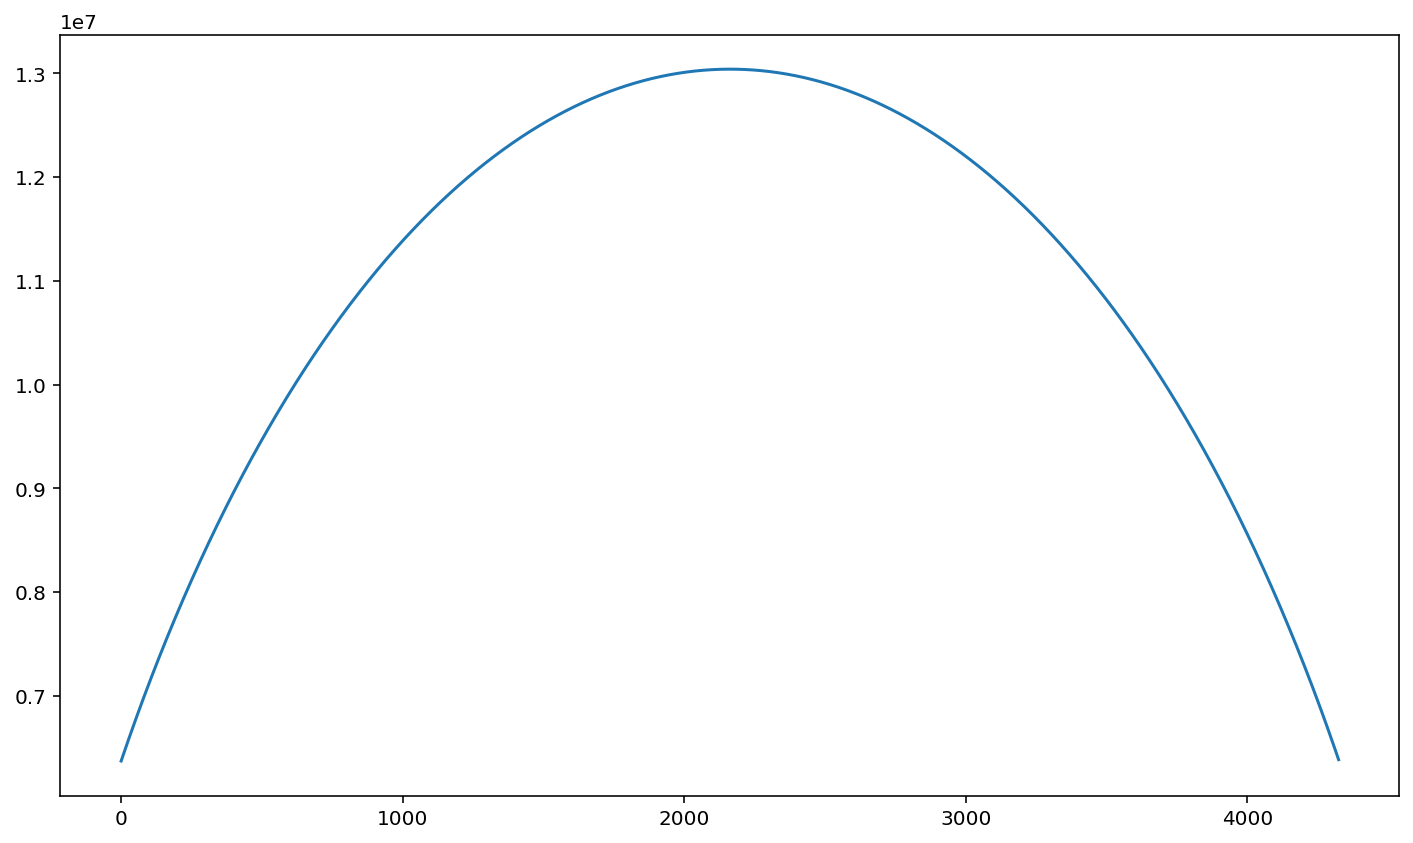

In [3]:
import matplotlib.pyplot as plt
import numpy as np

t_max = 10000
delta_t = 1
G = 6.67408e-11
m_e = 5.972e24

t = np.arange(0, t_max, delta_t) # array of time points from 0 to t_max

n_steps = len(t)

x = np.zeros(n_steps)
v = np.zeros(n_steps)
            
x[0] = 6.371e6 # initial displacement
v[0] = 8000 # initial velocity

for i in range(n_steps - 1):
    x[i+1] = x[i] + v[i] * delta_t
    v[i+1] = v[i] - (G*m_e/x[i]**2)*delta_t
    if x[i+1] < x[0]:
        break
    
plt.plot(t[:i], x[:i])

print("time:", t[i], "s")

### Part 2

By experimenting with different values of $v_0$, find an estimate of The Earth's escape velocity (the minimum initial velocity that results in the projectile escaping into space).

(You will have to increase the duration of the simulation. You might need to increase the time step $\Delta t$ in order for the simulation to run in a reasonable time - but this will decrease the accuracy. Experiment!)

### Part 3

The previous example only considered motion in one dimension. In this part you will extend to two dimensions.

Consider a projectile fired horizontally from the surface of the earth. Its position $\mathbf{x} = (x_1, x_2)$ relative to the centre of The Earth and its velocity is $\mathbf{v} = (v_1, v_2)$. The distance between the projectile and the centre of The Earth is $r = \sqrt{x_1^2 + x_2^2}$.

The vector equations governing its motion are:
$$\begin{align*}
\frac{d\mathbf{x}}{dt} &= \mathbf{v}\\
\frac{d\mathbf{v}}{dt} &= -\frac{Gm_\mathrm{e}}{r^3}\mathbf{x}
\end{align*}$$

Defining a timestep $\Delta t$:

$$ \begin{align*}
\mathbf{x}_{i+1} &= \mathbf{x}_i + \mathbf{v}_i\Delta t\\
\mathbf{v}_{i+1} &= \mathbf{v}_i -\frac{Gm_\mathrm{e}}{r^3}\mathbf{x_i}\Delta t
\end{align*}$$

Since $\mathbf{x}_i$ and $\mathbf{x}_i$ and are 2-dimensional vectors, `x` and `v` are now 2 by `n_steps` numpy arrays, where `x[0,i]` and `x[1,i]` are $x_1$ and $x_2$ co-ordinates of the projectile at timestep `i`.

```
x = np.zeros((2, n_steps))
v = np.zeros((2, n_steps))
```

The update step for the position `x` becomes:

```
x[:,i+1] = x[:,i] + v[:,i] * delta_t
```

Determine the code for the update step for the velocity `v` (hint: first calculate the value of the scalar quantity `r`).

Use this code to write a simulation of the trajectory of the projectile. Create three plots of its trajectory, $x_1$ against $t$, $x_2$ against $t$, and $x_1$ against $x_2$.


| | |
|---|---|
|duration | $\sout{10000~\mathrm{s}}~50000~\mathrm{s}$|
|time step | $1~\mathrm{s}$|
|mass of Earth | $5.972 \times 10^{24}~\mathrm{kg}$|
|radius of Earth | $6.371~\times 10^6~\mathrm{m}$ |
|initial velocity (horizontal) | $10000~\mathrm{m}/\mathrm{s}$ |
|initial velocity (vertical) | $0~\mathrm{m}/\mathrm{s}$ |
|gravitational constant | $6.674 \times 10^{11}~\mathrm{Nm}^2/\mathrm{kg}^2$ |



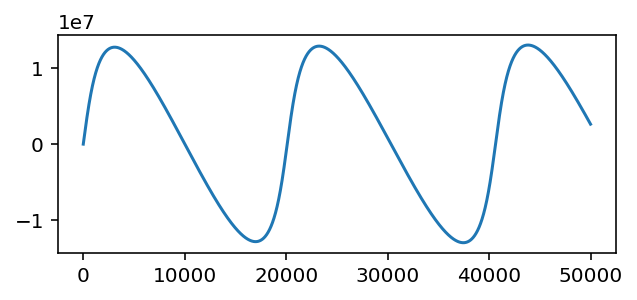

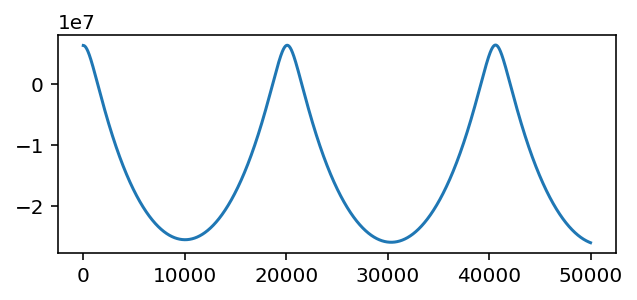

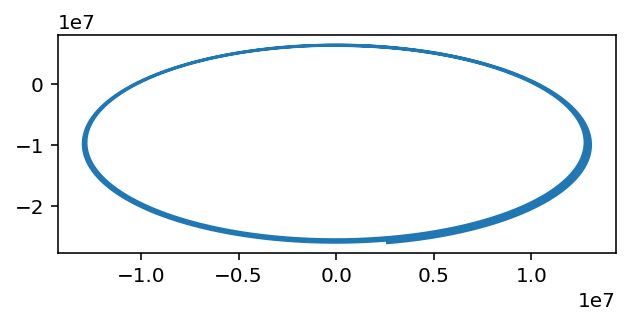

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t_max = 50000
# There was a mistake in the question. Increase t_max to 5000
# To clearly see the trajectory - it should be an elliptical orbit
delta_t = 1 # time step is 1 ~s
G = 6.67408e-11
m_e = 5.972e24

t = np.arange(0, t_max, delta_t) # array of time points from 0 to t_max

n_steps = len(t)

x = np.zeros((2, n_steps))
v = np.zeros((2, n_steps))
            
x[0,0] = 0 # initial position
x[1,0] = 6.371e6
v[0,0] = 10000 # initial velocity
v[1,0] = 0

for i in range(n_steps - 1):
    r = np.sqrt(x[0,i]**2 + x[1,i]**2)
    x[:,i+1] = x[:,i] + v[:,i] * delta_t
    v[:,i+1] = v[:,i] - (G*m_e/r**3)*x[:,i]*delta_t

plt.figure(figsize=(5,2))
plt.plot(t, x[0,:])
    
plt.figure(figsize=(5,2))
plt.plot(t, x[1,:])
    
plt.figure(figsize=(5,2))
plt.plot(x[0,:], x[1,:])


### Part 4

The kinetic energy (in Joules) of the satellite is given by the equation

$$ E_\mathrm{K} = \frac{1}{2}{mv}^2$$

where $m$ is the mass of the satellite and $v$ is the magnitude of its velocity.

Its potential energy (in Joules) is given by:

$$ E_\mathrm{P} = -\frac{Gm_\mathrm{e}mv}{r}$$

where $r$ is the distance between the satellite and the centre of The Earth.

Use array slicing and vector operations to calculate one-dimensional arrays `E_K` and `E_P` representing the kinetic and potential energies of the satellite (i.e. `E_K[i]` is the kinetic energy at time point `i`). Plot `E_K`, `E_P` and the total energy `E_K` + `E_P` on the same graph. Add suitable x and y labels and a legend.


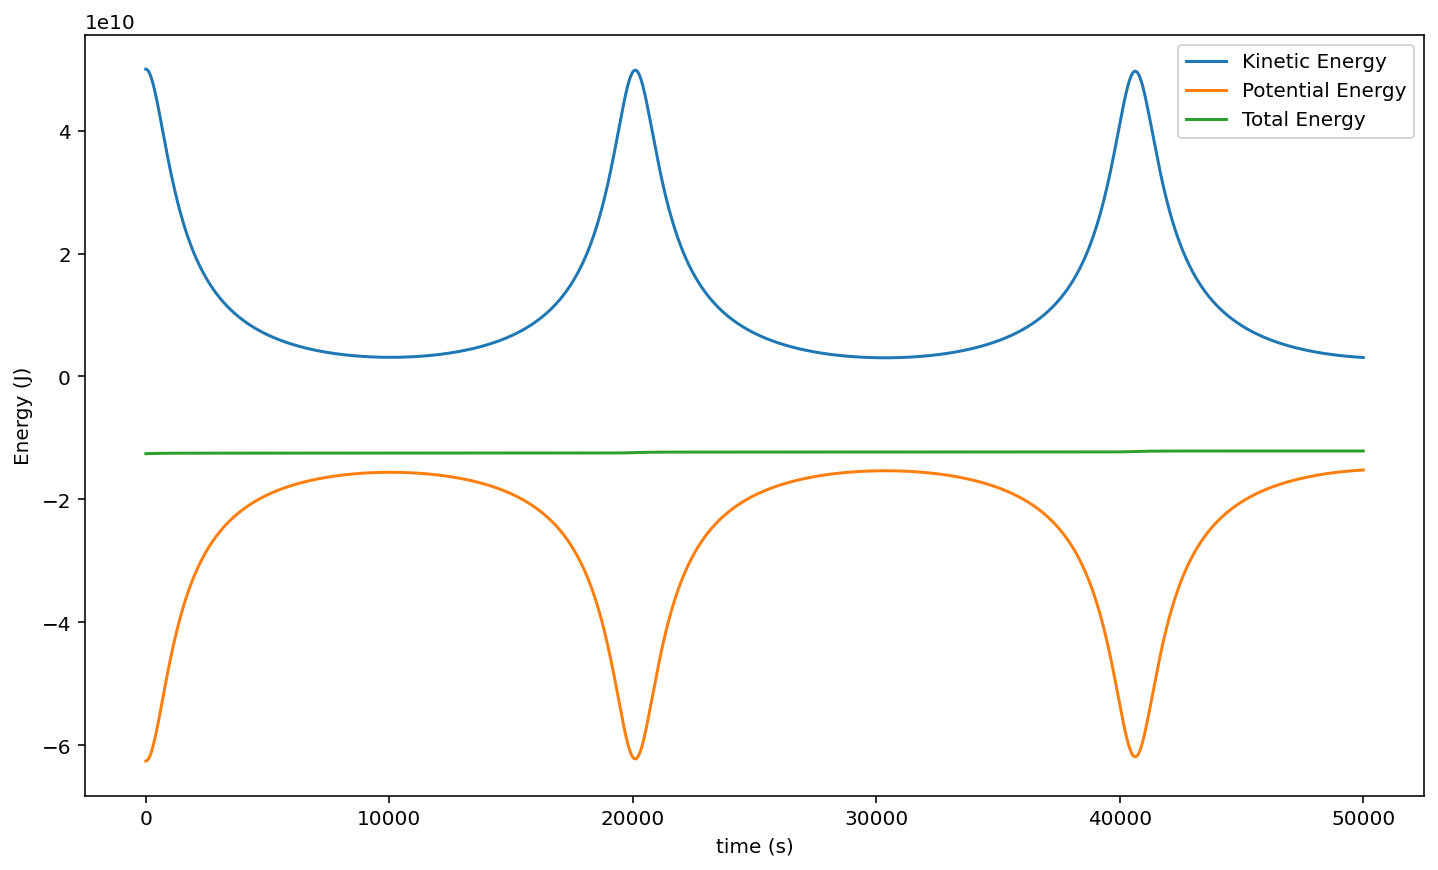

In [25]:
m = 1000

v1 = v[0,:]
v2 = v[1,:]

v_mag_sq = v1**2 + v2**2

x1 = x[0,:]
x2 = x[1,:]

dis = np.sqrt(x1**2 + x2**2)

E_k = 0.5 * m * v_mag_sq

plt.plot(t, E_k, label = "Kinetic Energy")

E_p = - G * m_e * m / dis

plt.plot(t, E_p, label="Potential Energy")

plt.plot(t, E_k + E_p, label="Total Energy")

plt.xlabel("time (s)")
plt.ylabel("Energy (J)")
plt.legend()